12288


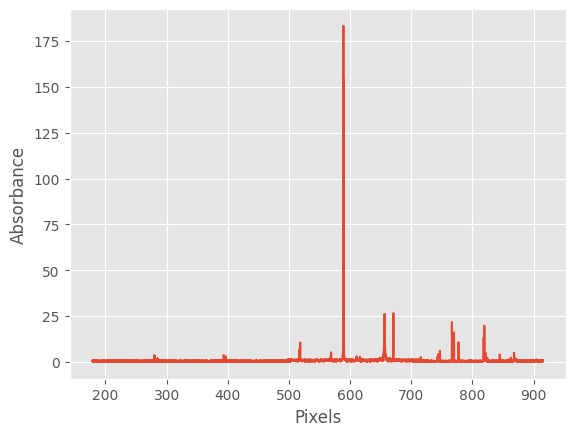

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import preprocessing as pp
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error



def optimise_pls_cv(X, Y, n_comp):

    pls = PLSRegression(n_components = n_comp,max_iter=500,tol=1e-6)
    r2 = []
    rmse = []
    mae = []
    Ypredict = []
    
    for test in range(len(Y)):
        X1 = np.delete(X,test,0)
        Y1 = np.delete(Y,test)
        pls.fit(X1,Y1)
        Ypredict.append(pls.predict(X[test].reshape(1, -1)).flatten())
        
    Y = Y
    Ypredict = np.array(Ypredict)
    r2 = r2_score(Y,Ypredict)
    rmse = np.sqrt(mean_squared_error(Y, Ypredict))
    mae = mean_absolute_error(Y, Ypredict)
    
    return (Ypredict, r2, rmse, mae)


data = pd.read_csv(r"D:\20240412\Rb_analysis\0412wei_mean.csv",header=None).T
Y = data.values[1:,0].astype(float)
X = data.values[1:, 1:].astype(float)
wl = data.values[0, 1:].astype(float)
######################## Plot the data

print(len(wl))
with plt.style.context('ggplot'):
    plt.plot(wl, X[0,:].T)
    plt.xlabel("Pixels")
    plt.ylabel("Absorbance")
plt.show()

In [2]:

################## test with n-2 components
r2s = []
rmses = []
maes = []
yp = []
xticks = np.arange(1, 11)

for n_comp in xticks:
    Ypredict, r2, mse, mae = optimise_pls_cv(X, Y, n_comp)
    #Y2, r22, mse2 = pp.optimise_pls_cv(X2, Y, n_comp)
    r2s.append(r2)
    rmses.append(mse)
    maes.append(mae)
    yp.append(Ypredict)


In [3]:
yp = np.array(yp).reshape(len(yp),-1)
np.savetxt(r'D:\20240412\Rb_analysis\PLS' + '//' + 'Y_predict.csv',yp,delimiter=',',fmt='%s')

In [5]:
print(rmses[1])
print(r2s[4])
print(maes[4])

261.7855040172975
0.07431331488907733
183.42109153674227


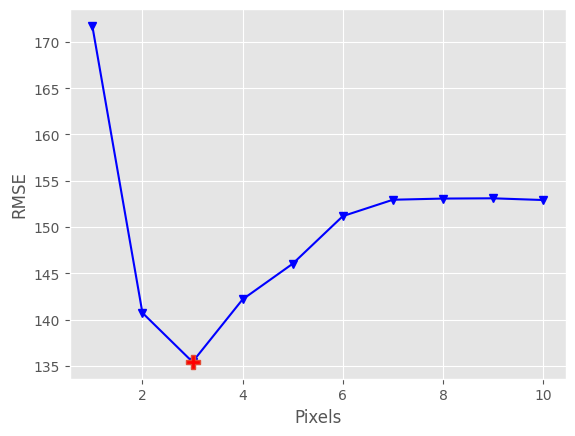

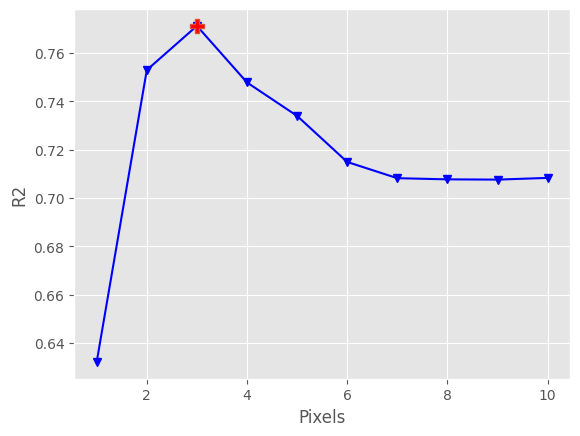

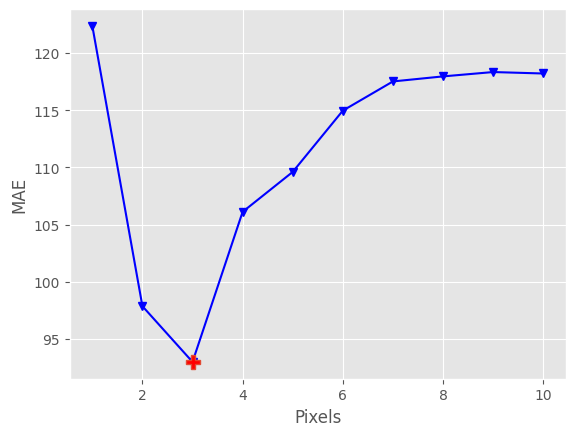

142.18287679185488
0.7478337978444625
106.10964165036776


In [17]:
#################### Draw mse ,r2 and (vip for max r2)
RMSE_score = pp.plot_metrics(xticks,rmses, 'RMSE', 'min')
R2_score = pp.plot_metrics(xticks,r2s, 'R2', 'max')
MAE_score = pp.plot_metrics(xticks,maes, 'MAE', 'min')
print(rmses[RMSE_score])
print(r2s[RMSE_score])
print(maes[RMSE_score])

In [16]:
Ypredict = []
for test in range(len(Y)):
    X1 = np.delete(X,test,0)
    Y1 = np.delete(Y,test)
    pls.fit(X1,Y1)
    Ypredict.append(pls.predict(X).flatten())
Ypredict = np.array(Ypredict)


NameError: name 'pls' is not defined

In [ ]:
P_error = np.max(Ypredict,axis = 0) - np.mean(Ypredict,axis = 0)
M_error = np.mean(Ypredict,axis = 0) - np.min(Ypredict,axis = 0)
error = np.vstack((M_error,P_error))
Ypredict = np.mean(Ypredict,axis = 0)

In [ ]:
################### plot all
plt.figure(figsize=(6, 6))
with plt.style.context('ggplot'):
    plt.errorbar(Y, Ypredict, yerr = error,color='red',ecolor = 'b',fmt='.',capsize = 3)
    z1 = np.polyfit(Y, Ypredict, 1)
    plt.plot(Y, Y, '-g', label='Expected regression line')
    plt.plot( Y, np.polyval(z1, Y),color='black', label=('Predicted Y'))  
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.legend()
    plt.plot()
    plt.show()

In [ ]:


    z1 = np.polyfit(Y, Ypredict, 1)
    plt.plot(Y, Y, '-g', label='Expected regression line')
    plt.plot( Y, np.polyval(z1, Y),color='b', label=('Predicted Y'))  
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.legend()
    plt.plot()
plt.show()

In [ ]:


# X2 =  - savgol_filter(X, 3, polyorder=2, deriv=2)
# ####################### plot savgol_filter data
# plt.figure(figsize=(8, 4.5))
# with plt.style.context('ggplot'):
#     plt.plot(wl, X2.T)
#     plt.xlabel("Pixels")
#     plt.ylabel("After Savitzky-Golay Filter")
#     plt.show()

################## test with n-2 components
r2s = []
#r2s2 = []
mses = []
xticks = np.arange(1, 5)
for n_comp in xticks:
    Ypredict, r2, mse = pp.optimise_pls_cv(X, Y, n_comp)
    #Y2, r22, mse2 = pp.optimise_pls_cv(X2, Y, n_comp)
    r2s.append(r2)
    #r2s2.append(r22)
    mses.append(mse)

#################### Draw mse ,r2 and (vip for max r2)
MSE_score = pp.plot_metrics(xticks,mses, 'MSE', 'min')
R2_score = pp.plot_metrics(xticks,r2s, 'R2', 'max')
#R22_score = pp.plot_metrics(xticks,r2s2, 'R2', 'max')
pls = PLSRegression(n_components = R2_score)
pls.fit(X,Y)
vips = pp._calculate_vips(pls)
with plt.style.context('ggplot'):
    plt.plot(wl, vips, '-r', label='vips')
    plt.show()


################### F" data
Ypredict, r21, mse = pp.optimise_pls_cv(X, Y, R2_score)
#Y2, r22, mse= pp.optimise_pls_cv(X2, Y, R22_score)

################### plot all
plt.figure(figsize=(6, 6))
with plt.style.context('ggplot'):
    plt.scatter(Y, Ypredict, color='red')
    #plt.scatter(Y, Y2, color='blue')
    
    z1 = np.polyfit(Y, Ypredict, 1)
    #z2 = np.polyfit(Y, Y2, 1)

    plt.plot(Y, Y, '-g', label='Expected regression line')
    plt.plot( Y, np.polyval(z1, Y),color='r', label=('Predicted Y ,R2 = ' + str(r21)))
    #plt.plot( Y, np.polyval(z2, Y),color='blue', label=('Predicted Y" ,R2 = ' + str(r22)))   
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.legend()
    plt.plot()
plt.show()